# <u><b>Deep Leaerning Generative Models Project</b></u>

1. Importing required Libraries
- torch: Core PyTorch library for tensor operations.
- torch.nn: PyTorch module for neural network layers.
- torch.optim: PyTorch module for optimization algorithms.
- torch.utils.data: Utilities for loading and processing datasets.
- torchvision: PyTorch package for image processing and datasets.
- matplotlib.pyplot: Library for plotting graphs and images.




In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, utils
import matplotlib.pyplot as plt


2. Definining the generator
- Generator: Neural network to generate new data.
- init: Initializes the layers of the generator.
- forward: Defines the forward pass of the generator.


In [2]:
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.fc(x)

3. Defining Discriminator

- Discriminator: Neural network to distinguish between real and fake data.
- init: Initializes the layers of the discriminator.
- forward: Defines the forward pass of the discriminator.


In [3]:
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)

4. Setting Hyperparameters

- latent_dim: Dimension of the noise vector.
- image_dim: Dimension of the input images (28x28 pixels).
- batch_size: Number of samples per batch.
- lr: Learning rate for the optimizer.
- num_epochs: Number of epochs to train the model.

In [4]:
# Hyperparameters
latent_dim = 100
image_dim = 28 * 28  # Assuming 28x28 images
batch_size = 64
lr = 0.0002
num_epochs = 50

5. Preparing the Dataloader

- transform: Transforms to apply to the dataset (convert to tensor and normalize).
- datasets.MNIST: MNIST dataset of handwritten digits.
- DataLoader: Utility to load the dataset in batches.

In [5]:
# DataLoader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

dataset = datasets.MNIST(root='dataset/', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4638959.68it/s]


Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 134546.03it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1271915.67it/s]


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3026776.10it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



6. Initializing Models,Loss and Optimizers


- generator: Instance of the generator model.
- discriminator: Instance of the discriminator model.
- criterion: Binary cross-entropy loss.
- optimizer_G: Optimizer for the generator.
- optimizer_D: Optimizer for the discriminator.

In [6]:
# Initialize models
generator = Generator(latent_dim, image_dim)
discriminator = Discriminator(image_dim)

# Loss and Optimizer
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)


7. Training Loop

- Training loop: Iterates over epochs and batches to train the GAN.
- Train Discriminator: Updates discriminator weights to distinguish between real and fake images.
- Train Generator: Updates generator weights to produce more realistic images.
- Logging: Prints the loss values for both generator and discriminator.
- Image Generation: Generates and displays images every 10 epochs.

Epoch [1/50] Loss D: 0.3149, loss G: 1.2373


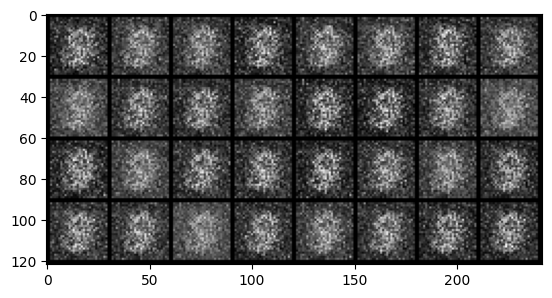

Epoch [2/50] Loss D: 0.3986, loss G: 1.2662
Epoch [3/50] Loss D: 0.2547, loss G: 1.6411
Epoch [4/50] Loss D: 0.4485, loss G: 1.2961
Epoch [5/50] Loss D: 0.4005, loss G: 1.2392
Epoch [6/50] Loss D: 0.5186, loss G: 1.1296
Epoch [7/50] Loss D: 0.6006, loss G: 1.0371
Epoch [8/50] Loss D: 0.6453, loss G: 0.8240
Epoch [9/50] Loss D: 0.5051, loss G: 1.0524
Epoch [10/50] Loss D: 0.3858, loss G: 1.2346
Epoch [11/50] Loss D: 0.6665, loss G: 0.8332


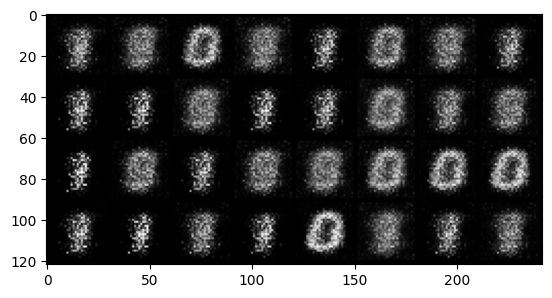

Epoch [12/50] Loss D: 0.5895, loss G: 0.9661
Epoch [13/50] Loss D: 0.4715, loss G: 1.4527
Epoch [14/50] Loss D: 0.5929, loss G: 0.9462
Epoch [15/50] Loss D: 0.6229, loss G: 1.0941
Epoch [16/50] Loss D: 0.4244, loss G: 1.2689
Epoch [17/50] Loss D: 0.5963, loss G: 0.9243
Epoch [18/50] Loss D: 0.3396, loss G: 1.4304
Epoch [19/50] Loss D: 0.5762, loss G: 1.0109
Epoch [20/50] Loss D: 0.5624, loss G: 1.0276
Epoch [21/50] Loss D: 0.4146, loss G: 1.5863


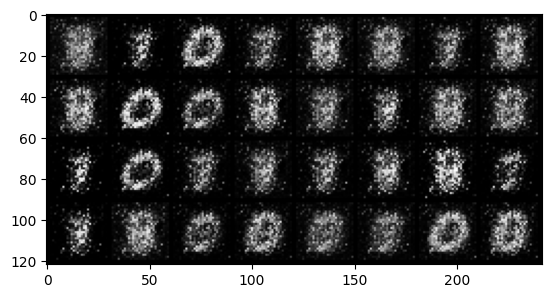

Epoch [22/50] Loss D: 0.3861, loss G: 1.5670
Epoch [23/50] Loss D: 0.4891, loss G: 1.2836
Epoch [24/50] Loss D: 0.5715, loss G: 1.1770
Epoch [25/50] Loss D: 0.6047, loss G: 1.1114
Epoch [26/50] Loss D: 0.4786, loss G: 1.2540
Epoch [27/50] Loss D: 0.5190, loss G: 1.0966
Epoch [28/50] Loss D: 0.4058, loss G: 1.5620
Epoch [29/50] Loss D: 0.4086, loss G: 2.1507
Epoch [30/50] Loss D: 0.2063, loss G: 2.7194
Epoch [31/50] Loss D: 0.2206, loss G: 2.2285


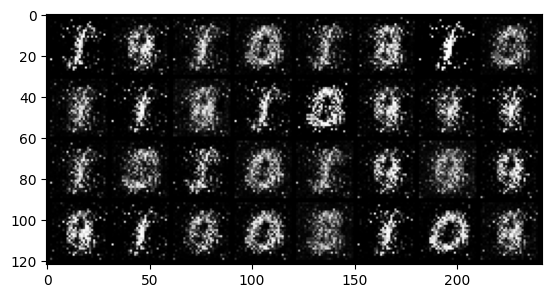

Epoch [32/50] Loss D: 0.3940, loss G: 1.2428
Epoch [33/50] Loss D: 0.3735, loss G: 1.4044
Epoch [34/50] Loss D: 0.4703, loss G: 1.5548
Epoch [35/50] Loss D: 0.4312, loss G: 1.5722
Epoch [36/50] Loss D: 0.4301, loss G: 1.3400
Epoch [37/50] Loss D: 0.4291, loss G: 1.5071
Epoch [38/50] Loss D: 0.3143, loss G: 1.6580
Epoch [39/50] Loss D: 0.2182, loss G: 2.6517
Epoch [40/50] Loss D: 0.4301, loss G: 2.0504
Epoch [41/50] Loss D: 0.2662, loss G: 2.2556


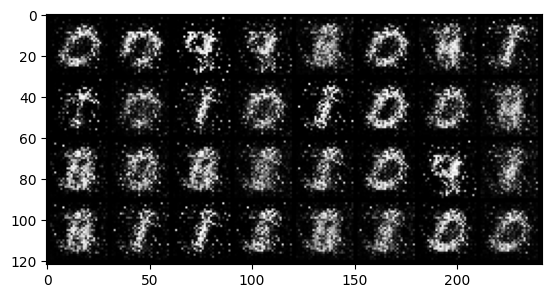

Epoch [42/50] Loss D: 0.4366, loss G: 1.7711
Epoch [43/50] Loss D: 0.4004, loss G: 1.8955
Epoch [44/50] Loss D: 0.2864, loss G: 2.3046
Epoch [45/50] Loss D: 0.3516, loss G: 2.3586
Epoch [46/50] Loss D: 0.3027, loss G: 2.1953
Epoch [47/50] Loss D: 0.2818, loss G: 2.5219
Epoch [48/50] Loss D: 0.3513, loss G: 2.1231
Epoch [49/50] Loss D: 0.5666, loss G: 1.8736
Epoch [50/50] Loss D: 0.3665, loss G: 2.4239


In [7]:
# Training Loop
for epoch in range(num_epochs):
    for batch_idx, (real, _) in enumerate(dataloader):
        batch_size = real.size(0)
        real = real.view(batch_size, -1)

        # Train Discriminator
        noise = torch.randn(batch_size, latent_dim)
        fake = generator(noise)

        disc_real = discriminator(real).view(-1)
        loss_D_real = criterion(disc_real, torch.ones_like(disc_real))

        disc_fake = discriminator(fake).view(-1)
        loss_D_fake = criterion(disc_fake, torch.zeros_like(disc_fake))

        loss_D = (loss_D_real + loss_D_fake) / 2
        optimizer_D.zero_grad()
        loss_D.backward()
        optimizer_D.step()

        # Train Generator
        noise = torch.randn(batch_size, latent_dim)
        fake = generator(noise)
        disc_fake = discriminator(fake).view(-1)

        loss_G = criterion(disc_fake, torch.ones_like(disc_fake))
        optimizer_G.zero_grad()
        loss_G.backward()
        optimizer_G.step()

    print(f'Epoch [{epoch+1}/{num_epochs}] Loss D: {loss_D:.4f}, loss G: {loss_G:.4f}')

    # Generate and save some images
    if epoch % 10 == 0:
        with torch.no_grad():
            noise = torch.randn(batch_size, latent_dim)
            fake = generator(noise).view(-1, 1, 28, 28)
            fake = fake * 0.5 + 0.5  # De-normalize to [0, 1]
            grid = utils.make_grid(fake, nrow=8, padding=2, normalize=True)
            plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
            plt.show()
